# Forecasting 


<div class="list-group" id="list-tab" role="tablist">
 <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Time Series forecasting</h3>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Time-Series" role="tab" aria-controls="profile">Time Series<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Plotting-data" role="tab" aria-controls="profile">Time Serires Plot<span class="badge badge-primary badge-pill"></span></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Stationarity of a Time Series</h3>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Test-for-Stationary" role="tab" aria-controls="profile">Test for Stationary<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Differencing" role="tab" aria-controls="profile">Differencing<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Decomposing" role="tab" aria-controls="profile">Decomposing<span class="badge badge-primary badge-pill"></span></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Univariate Forecasting techniques </h3>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Naive-Approach" role="tab" aria-controls="profile">Naive Approach<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Simple-Average" role="tab" aria-controls="profile">Simple Average<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Exponential-Smoothing" role="tab" aria-controls="profile">Exponential Smoothing<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Holt’s-Method" role="tab" aria-controls="profile">Holt’s Method<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Holt-Winters’-Method" role="tab" aria-controls="profile">Holt-Winters’ Method<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#ACF-&-PACF" role="tab" aria-controls="profile">ACF & PACF<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#ARIMA-Model" role="tab" aria-controls="profile">ARIMA Model<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Seasonal-ARIMA" role="tab" aria-controls="profile">Seasonal ARIMA<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#TBATS-model" role="tab" aria-controls="profile">TBATS model<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Univariate-fbprophet" role="tab" aria-controls="profile">Univariate fbprophet<span class="badge badge-primary badge-pill"></span></a>
<div class="list-group" id="list-tab" role="tablist">
 <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Multivariate Time Series</h3>
 <a class="list-group-item list-group-item-action" data-toggle="list" href="#Multivariate-Time-Series-–-VAR" role="tab" aria-controls="profile">Multivariate Time Series – VAR<span class="badge badge-primary badge-pill"></span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href="#Multivariate-fbprophet" role="tab" aria-controls="profile">Multivariate fbprophet<span class="badge badge-primary badge-pill"></span></a>

# Time Series forecasting

### Time Series
<br>A time series is usually modelled through a stochastic process Y(t), i.e. a sequence of random variables. In a forecasting setting we find ourselves at time t and we are interested in estimating Y(t+h), using only information available at time t.

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


from datetime import date as dt
from datetime import datetime,timedelta

In [52]:
#Importing data
df = pd.read_csv('dataset/train_timeseries.csv',nrows = 11856)
#Printing head
df.head()   


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [53]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('dataset/train_timeseries.csv', nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

In [54]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


### Plotting data

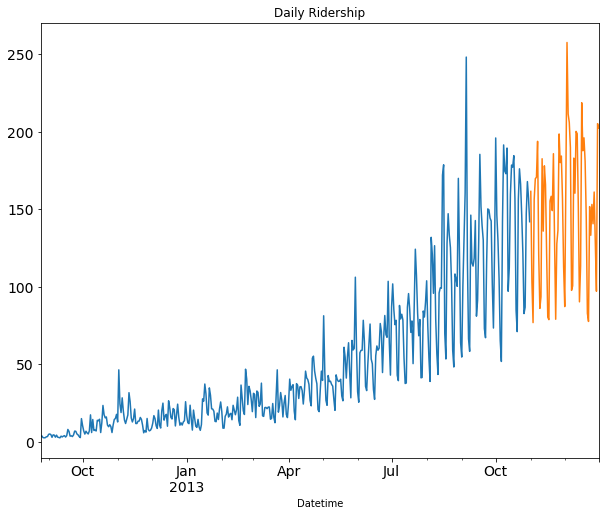

In [5]:
#Plotting data
train.Count.plot(figsize=(10,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(10,8), title= 'Daily Ridership', fontsize=14)
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Naive Approach

In the Naïve model, the forecasts for every horizon correspond to the last observed value.
<br>**Ŷ(t+h|t) = Y(t)**
<br>This kind of forecast assumes that the stochastic model generating the time series is a random walk.

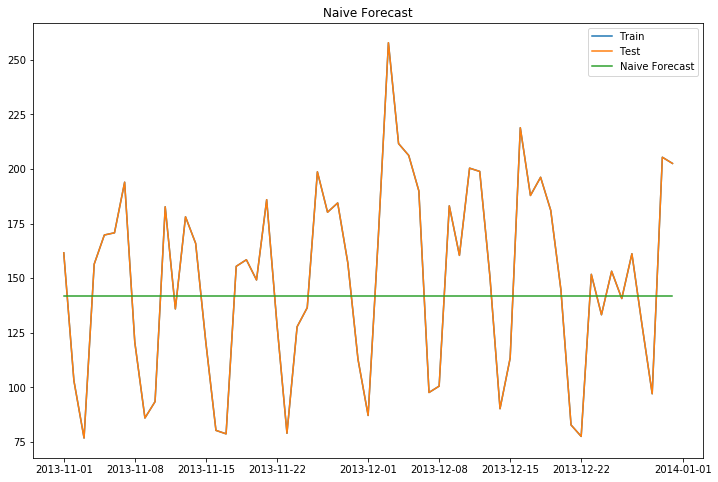

In [6]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(test.index, test['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [7]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test.Count, y_hat.naive))  
print('Mean Squared Error:', metrics.mean_squared_error(test.Count, y_hat.naive))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test.Count, y_hat.naive)))

Mean Absolute Error: 37.46448087431693
Mean Squared Error: 1928.6507285974499
Root Mean Squared Error: 43.91640614391676


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Simple Average
Simple Moving Average (SMA) takes the average over some set number of time periods. So a 10 period SMA would be over 10 periods (usually meaning 10 trading days).
The Simple Moving Average formula is a very basic arithmetic mean over the number of periods.

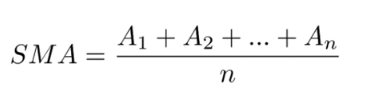

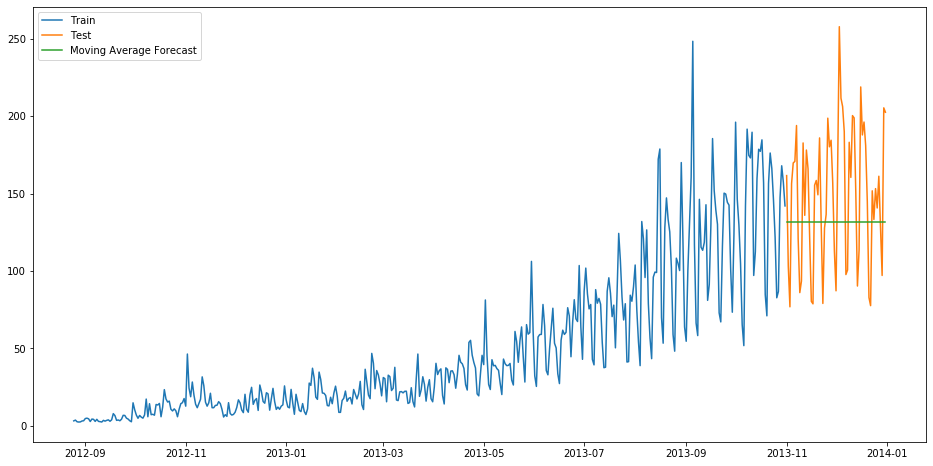

In [8]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()


In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test.Count, y_hat_avg.moving_avg_forecast))  
print('Mean Squared Error:', metrics.mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast)))

Mean Absolute Error: 39.94326047358834
Mean Squared Error: 2183.5440442218173
Root Mean Squared Error: 46.72840725106963


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


In [55]:
# The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('dataset/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
data.head()



 Parsed Data:


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Stationarity of a Time Series
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time.
**We can say that if a TS has a particular behaviour over time**, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

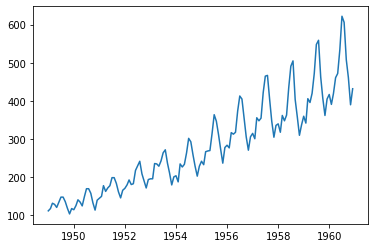

In [11]:
plt.plot(data)

### Test for Stationary

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later). So, more formally, we can check stationarity using the following:
1. **Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time.
2. **Dickey-Fuller Test:** This is one of the statistical tests for checking stationarity.
<br>**Note:** for further study click on link https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/ 

Back to checking stationarity, we’ll be using the rolling statistics plots along with Dickey-Fuller test results a lot so I have defined a function which takes a TS as input and generated them for us. Please note that I’ve plotted standard deviation instead of variance to keep the unit similar to mean.

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(window=24).std()
#     rolstd = timeseries.rolling(12).mean()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='gold', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

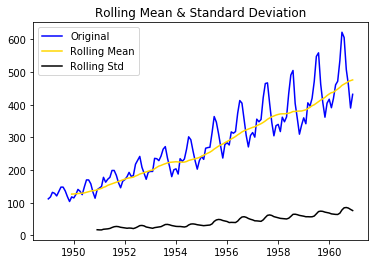

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
# test for stationarity 
test_stationarity(data)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.

### How to make a Time Series Stationary?
A time series can be broken down into 3 components.<br>
**Trend:** Upward & downward movement of the data with time over a large period of time (i.e. house appreciation)<br>
**Seasonality:** Seasonal variance (i.e. an increase in demand for ice cream during summer)<br>
**Noise:** Spikes & troughs at random intervals

<br>**Eliminating Trend and Seasonality**
The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


### Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

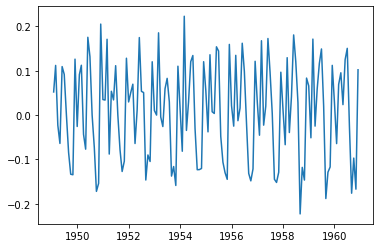

In [14]:
# By taking log 
data_log = np.log(data)
data_diff = data_log - data_log.shift()
plt.plot(data_diff)

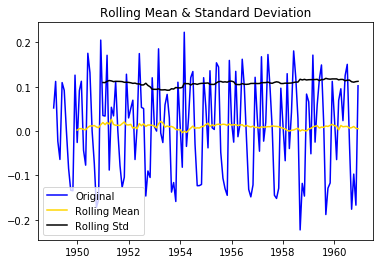

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [15]:
data_diff.dropna(inplace=True)
test_stationarity(data_diff)

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


### Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:

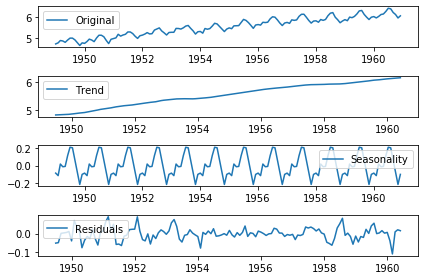

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
# Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

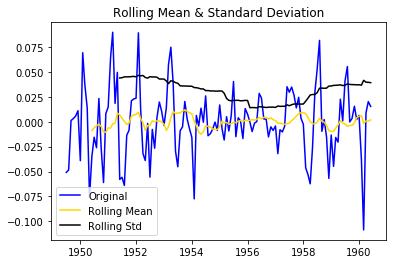

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [17]:
#  Lets check stationarity of residuals:
data_log_decompose = residual
data_log_decompose.dropna(inplace=True)
test_stationarity(data_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Univariate Forecasting techniques 

# Exponential Smoothing

Exponential Smoothing Methods are a family of forecasting models. **They use weighted averages of past observations to forecast new values**. Here, the idea is to give more importance to recent values in the series. Thus, as observations get older (in time), the importance of these values get exponentially smaller.

Simple exponential smoothing is a good choice for forecasting data with no clear trend or seasonal pattern. Forecasts are calculated using weighted averages, which means the largest weights are associated with most recent observations, while the smallest weights are associated with the oldest observations:
<br>where 0≤ α ≤1 is the smoothing parameter.

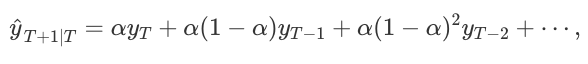

In [59]:
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing,Holt

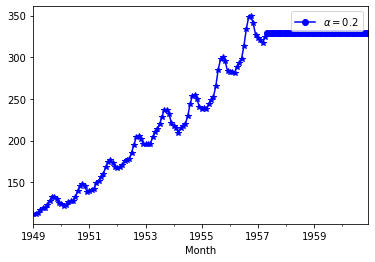

In [60]:
# Simple Exponential Smoothing
fit = SimpleExpSmoothing(data.iloc[:100]).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit.forecast(data.iloc[100:].shape[0]).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit.fittedvalues.plot(marker='*',  color='blue')


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(fcast1, data_log.iloc[100:]))  
print('Mean Squared Error:', metrics.mean_squared_error(fcast1, data_log.iloc[100:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(fcast1, data_log.iloc[100:])))

Mean Absolute Error: 323.4186875465774
Mean Squared Error: 104599.67827261669
Root Mean Squared Error: 323.418735191109


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Holt’s Method
Holt extended simple exponential smoothing (solution to data with no clear trend or seasonality) to **allow the forecasting of data with trends**. Holt’s method involves a forecast equation and two smoothing equations (one for the level and one for the trend)<bR>
where 0≤ α ≤1 is the level smoothing parameter, and 0≤ β* ≤1 is the trend smoothing parameter.

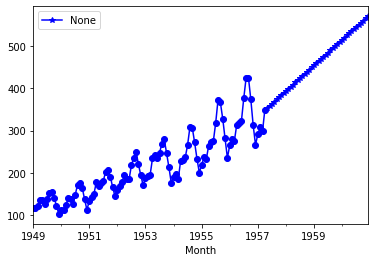

In [61]:
fit1 = Holt(data.iloc[:100]).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
forecast = fit1.forecast(data.iloc[100:].shape[0])
fit1.fittedvalues.plot(marker="o", color='blue')
forecast.plot(color='blue', marker="*", legend=True)

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(forecast.values, data_log.iloc[100:]))  
print('Mean Squared Error:', metrics.mean_squared_error(forecast, data_log.iloc[100:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(forecast, data_log.iloc[100:])))

Mean Absolute Error: 455.6328224735615
Mean Squared Error: 211679.02295038998
Root Mean Squared Error: 460.0858864933698


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Holt-Winters’ Method
Holt-Winters’ Method is suitable for data with trends and seasonalities which includes a seasonality smoothing parameter γ. There are two variations to this method:
1. Additive method: the seasonal variations are roughly constant through the series.
2. Multiplicative method: the seasonal variations are changing proportionally to the level of the series.
<br>Here, we run full Holt-Winters’ method including a trend component and a seasonal component. Statsmodels allows for all the combinations including as shown in the examples below:

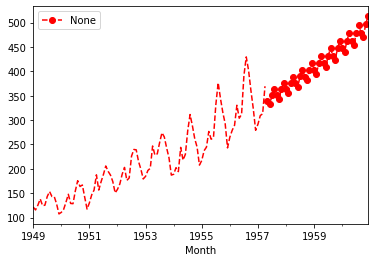

In [62]:
fit1 = ExponentialSmoothing(data.iloc[:100], seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
forecast = fit1.forecast(data.iloc[100:].shape[0])
fit1.fittedvalues.plot(style='--', color='red')
forecast.plot(style='--', marker='o', color='red', legend=True)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(forecast.values, data_log.iloc[100:]))  
print('Mean Squared Error:', metrics.mean_squared_error(forecast, data_log.iloc[100:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(forecast, data_log.iloc[100:])))

Mean Absolute Error: 408.17300552426224
Mean Squared Error: 168859.3996746871
Root Mean Squared Error: 410.92505359820433


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# ACF & PACF

**Autocorrelation function plot (ACF):**<br>
Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.

**Partial Autocorrelation Function plots (PACF):** A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed or the partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

Text(0.5, 1.0, 'Autocorrelation Function')

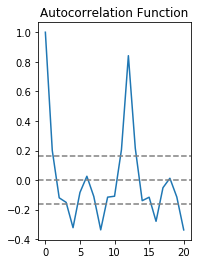

In [63]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_diff, nlags=20)
lag_pacf = pacf(data_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

**p** – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

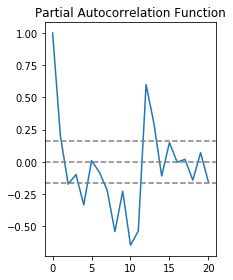

In [26]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**q** – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# AR Model
The predictors depend on the parameters (p,d,q) of the ARIMA model:

**Number of AR (Auto-Regressive) terms (p):** AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)<br>

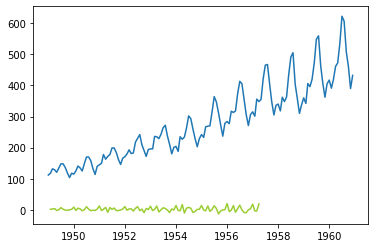

In [56]:
# p = 2, d = 1, q = 0
from statsmodels.tsa.arima_model import ARIMA
import pandas.util.testing as tm
model = ARIMA(data.iloc[:100], order=(2,1, 0))  
model_fit = model.fit(disp=0)  
plt.plot(data)
plt.plot(model_fit.fittedvalues, color='yellowgreen')

44


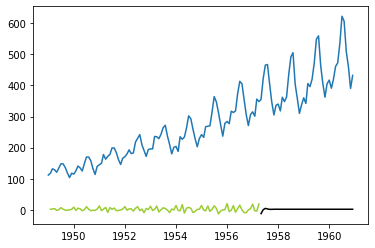

In [28]:
start_len = data.iloc[:100].shape[0]
end = data.iloc[100:].shape[0] +data.iloc[:100].shape[0] -1 
forecaste = model_fit.predict(start = start_len,end= end,exog=None)
print(len(forecaste))
plt.plot(data)
plt.plot(model_fit.fittedvalues, color='yellowgreen')
plt.plot(forecaste, color = 'black')

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(forecaste, data_log.iloc[100:]))  
print('Mean Squared Error:', metrics.mean_squared_error(forecaste, data_log.iloc[100:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(forecaste, data_log.iloc[100:])))

Mean Absolute Error: 4.07126389999877
Mean Squared Error: 21.090268799000885
Root Mean Squared Error: 4.5924142669189685


# MA Model
**Number of MA (Moving Average) terms (q):** MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value<br>


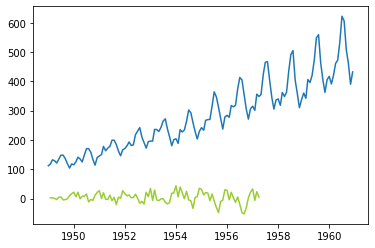

In [57]:
# p =0, d = 1, q= 2
model = ARIMA(data.iloc[:100], order=(0, 1, 2))  
results_MA = model.fit(disp=0)  
plt.plot(data)
plt.plot(results_MA.fittedvalues, color='yellowgreen')

44


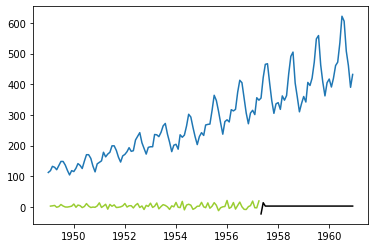

In [31]:
start_len = data.iloc[:100].shape[0]
end = data.iloc[100:].shape[0] +data.iloc[:100].shape[0] -1 
forecaste = results_MA.predict(start = start_len,end= end,exog=None)
print(len(forecaste))
plt.plot(data)
plt.plot(model_fit.fittedvalues, color='yellowgreen')
plt.plot(forecaste, color = 'black')

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(forecaste, data_log.iloc[100:]))  
print('Mean Squared Error:', metrics.mean_squared_error(forecaste, data_log.iloc[100:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(forecaste, data_log.iloc[100:])))

Mean Absolute Error: 4.363333931310164
Mean Squared Error: 33.635943625345014
Root Mean Squared Error: 5.799650301987613


# ARIMA Model

ARIMA stands for Auto Regressive Integrated Moving Average. There are seasonal and Non-seasonal ARIMA models that can be used for forecasting

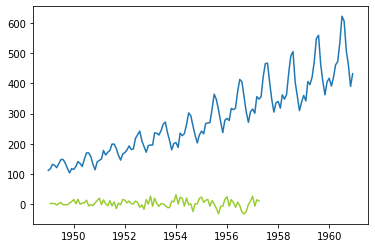

In [58]:
# p =2, d =1, q =2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.iloc[:100], order=(2, 1, 2))  
results_ARIMA = model.fit(disp= 0)  
plt.plot(data)
plt.plot(results_ARIMA.fittedvalues, color='yellowgreen')
plt.show()

44


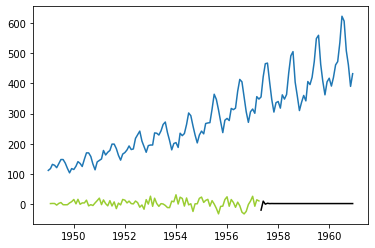

In [34]:
start_len = data.iloc[:100].shape[0]
end = data.iloc[100:].shape[0] +data.iloc[:100].shape[0] -1 
forecaste = results_ARIMA.predict(start = start_len,end= end,exog=None)
print(len(forecaste))
plt.plot(data)
plt.plot(results_ARIMA.fittedvalues, color='yellowgreen')
plt.plot(forecaste, color = 'black')

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(forecaste, data_log.iloc[100:]))  
print('Mean Squared Error:', metrics.mean_squared_error(forecaste, data_log.iloc[100:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(forecaste, data_log.iloc[100:])))

Mean Absolute Error: 4.232109640449903
Mean Squared Error: 28.39599462864029
Root Mean Squared Error: 5.3287892272673245


Taking it back to original scale
Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Seasonal ARIMA 

An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA.
1. The limitations of ARIMA when it comes to seasonal data.
2. The SARIMA extension of ARIMA that explicitly models the seasonal element in univariate data.
<br>It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality
<br> Here the Seasonal Component are added i.e. P, Q, D and m (seasonal period)

In [1]:
#building the model
from pmdarima.arima import auto_arima

In [31]:
# p - 0 to 3, q- 0 to 2, d =1
# P- 0 to 2, Q- 0 to 2, D =1 , m =12

model = auto_arima(data_log.iloc[:100], start_p=0, start_q=0, max_p=3, max_q=2, m=12,max_P=2,d=1,
    max_D=1,max_Q=2,start_P=0, seasonal=True, trace=True,
                      error_action='ignore', 
                      suppress_warnings=True, 
                      stepwise=True)  




Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=-298.798, BIC=-291.400, Time=0.624 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=-272.373, BIC=-267.441, Time=0.040 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=-300.096, BIC=-290.233, Time=0.568 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=-307.774, BIC=-297.910, Time=0.763 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=-274.343, BIC=-271.877, Time=0.104 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=-282.037, BIC=-274.639, Time=0.172 seconds
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=-305.928, BIC=-293.598, Time=1.076 seconds
Fit ARIMA(0,1,1)x(0,1,2,12) [intercept=True]; AIC=-305.936, BIC=-293.607, Time=1.820 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=-301.876, BIC=-292.013, Time=0.968 seconds
Fit ARIMA(0,1,1)x(1,1,2,12) [intercept=True]; AIC=-303.917, BIC=-289.122, Time=2.451 seconds
Fit ARIMA(1,1,1)x(0,1,1,12

In [32]:
forecasted_value = model.predict(n_periods=len(data_log.iloc[100:]))

In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(forecasted_value, data_log.iloc[100:]))  
print('Mean Squared Error:', metrics.mean_squared_error(forecasted_value, data_log.iloc[100:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(forecasted_value, data_log.iloc[100:])))

Mean Absolute Error: 0.08760849154151086
Mean Squared Error: 0.009905303041158657
Root Mean Squared Error: 0.09952538892744231


 <a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# TBATS model

Time-series forecasting refers to the use of a model to predict future values based on previously observed values. Many researchers are familiar with time-series forecasting yet they struggle with specific types of time-series data. One such type of data is data with seasonality. There can be many types of seasonalities present (e.g., time of day, daily, weekly, monthly, yearly).<BR>

TBATS is a forecasting method to model time series data.The main aim of this is to forecast time series with complex seasonal patterns using exponential smoothing.

TBATS is an acronym for key features of the model:

1. T: Trigonometric seasonality
2. B: Box-Cox transformation
3. A: ARIMA errors
4. T: Trend
5. S: Seasonal components
<br>TBATS makes it easy for users to handle data with multiple seasonal patterns. This model is preferable when the seasonality changes over time.

In [18]:
df = pd.read_csv('dataset/train_tbats.csv')
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')
y = df['sales']
y_to_train = y.iloc[:(len(y)-365)]
y_to_test = y.iloc[(len(y)-365):] # last year for testing

In [19]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Univariate fbprophet

The Prophet uses a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:
<br>y(t)= g(t) + s(t) + h(t) + εt
<br>g(t): piecewise linear or logistic growth curve for modeling non-periodic changes in time series
<br>s(t): periodic changes (e.g. weekly/yearly seasonality)
<br>h(t): effects of holidays (user provided) with irregular schedules
<br>εt: error term accounts for any unusual changes not accommodated by the model<br>
Using time as a regressor, Prophet is trying to fit several linear and non linear functions of time as components. Modeling seasonality as an additive component is the same approach taken by exponential smoothing in Holt-Winters technique . Prophet is framing the forecasting problem as a curve-fitting exercise rather than looking explicitly at the time based dependence of each observation within a time series.

follow the steps for installing thefbprophet https://stackoverflow.com/questions/53178281/installing-fbprophet-python-on-windows-10

In [ ]:
from fbprophet import Prophet

In [2]:
# Loading the data
master_data = pd.read_csv(r'dataset/AirPassengers_new.csv')

# Convert the date value into required format
master_data['Date'] = pd.to_datetime(master_data['Month'], format='%Y-%m-%d')
master_data.head()

,Month,Passengers,Temp,Humidity,Date
0,1949-01,112,19,15,1949-01-01
1,1949-02,118,30,19,1949-02-01
2,1949-03,132,40,11,1949-03-01
3,1949-04,129,32,15,1949-04-01
4,1949-05,121,20,10,1949-05-01


In [3]:
# Extracting only the required columns from dataset
master_data = master_data[['Date','Passengers','Temp','Humidity']]

# Changing the column names as accepted by FBProphet
master_data.rename(columns={"Date": "ds", "Passengers": "y"},inplace=True)
master_data.head()

,ds,y,Temp,Humidity
0,1949-01-01,112,19,15
1,1949-02-01,118,30,19
2,1949-03-01,132,40,11
3,1949-04-01,129,32,15
4,1949-05-01,121,20,10


In [4]:
training_months = ['1960-01-01']

# Lets assume, we are forecasting for "France"
Country = "France"

year_valid_start = 1960
year_valid_end = 1961
forecasting_period = 12 # Number of months (monthly data) to forecast


# Creating a forecast dataframe
final_forecast = pd.DataFrame()

In [5]:
for date in training_months:

    train_set = master_data.loc[master_data['ds'] < date,]

    # defining the model
    # Since it is monthly dataset, we can add seasonality only from quarterly
    m = Prophet(daily_seasonality=False, yearly_seasonality=False, weekly_seasonality=False)\
            .add_country_holidays(country_name=Country)\
            .add_seasonality(name="Yearly", period=365.25, fourier_order=10)\
            .add_seasonality(name='half_yearly', period=365.25/2, fourier_order=10)\
            .add_seasonality(name='Quaterly', period=365.25/4, fourier_order=10)\


    ## Model Fit
    m.fit(train_set)

    ## Making future dataframes
    year = year_valid_start
    day = 1
    month = int(date[5:7])
    month1 = 1
    year1 = year_valid_end

    # # Creating test dataframes
    test_prophet = m.make_future_dataframe(periods= forecasting_period , 
                                           freq='M', include_history=False)
    test_prophet['ds'] =  test_prophet['ds'] + timedelta(days=1)
    test_prophet['Month'] = test_prophet['ds'].apply(lambda x: x.month)


    # Forecasting results
    forecast_prophet = m.predict(test_prophet)
    test_pred_prophet = forecast_prophet

    test_prophet['Prophet_Predictions'] = test_pred_prophet['yhat'].tolist()

    test_prophet = test_prophet.merge(master_data[['ds','y']], how='left', on='ds')

    final_forecast = pd.concat([final_forecast, test_prophet])

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [6]:
final_forecast.head()

,ds,Month,Prophet_Predictions,y
0,1960-01-01,1,422.205873,417
1,1960-02-01,2,418.510881,391
2,1960-03-01,3,464.118680,419
3,1960-04-01,4,457.475952,461
4,1960-05-01,5,457.263527,472


 <a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Multivariate Time Series – VAR

A Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables.<br>
Consider the above example. Now suppose our dataset includes perspiration percent, dew point, wind speed, cloud cover percentage, etc. along with the temperature value for the past two years. In this case, there are multiple variables to be considered to optimally predict temperature. A series like this would fall under the category of multivariate time series. Below is an illustration of this:
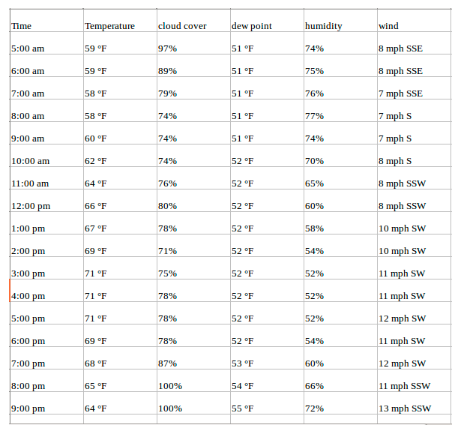


Now that we understand what a multivariate time series looks like, let us understand how can we use it to build a forecast.

**Dealing with a Multivariate Time Series – VAR**
In this section, I will introduce you to one of the most commonly used methods for multivariate time series forecasting – Vector Auto Regression (VAR).

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.<br>
for further unnderstanding for theory:https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [8]:
df = pd.read_excel("dataset/AirQualityUCI.xlsx",parse_dates = [['Date','Time']])

In [9]:
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

In [10]:
#missing value treatment
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == -200:
           data[j][i] = data[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

C:\Users\himanshu\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1.75628733e-01, 1.52399674e-01, 1.15090998e-01, 1.04309966e-01,
       9.29562919e-02, 6.90255307e-02, 5.76654697e-02, 3.43596700e-02,
       3.06350634e-02, 1.18801270e-02, 2.46819409e-03, 7.09473977e-05])

In [11]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\himanshu\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\himanshu\Anaconda3\envs\venv\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [12]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]


In [13]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[2.34562472e+00 1.08604049e+03 2.80752383e+02 1.24358835e+01
  1.05542000e+03 2.81217778e+02 6.59528135e+02 1.68188388e+02
  1.15845997e+03 8.50834322e+02 2.73623551e+01 1.55617864e+01
  5.15356506e-01]]


C:\Users\himanshu\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Multivariate fbprophet

In [7]:
regressor_columns = ['ds','Temp','Humidity']

# Defining final forecast dataframe
final_forecast = pd.DataFrame([])

In [8]:
for date in training_months:

    train_set = master_data.loc[master_data['ds'] < date,]

    test_regressor_data = master_data[regressor_columns]
    test_prophet_features = test_regressor_data.loc[test_regressor_data['ds']>=date,]

    # defining the model
    # Since it is monthly dataset, we can add seasonality only from quarterly
    m = Prophet(daily_seasonality=False, yearly_seasonality=False, weekly_seasonality=False)\
            .add_country_holidays(country_name=Country)\
            .add_seasonality(name="Yearly", period=365.25, fourier_order=10)\
            .add_seasonality(name='half_yearly', period=365.25/2, fourier_order=10)\
            .add_seasonality(name='Quaterly', period=365.25/4, fourier_order=10)\


    ## Model Fit
    m.fit(train_set)

    ## Making future dataframes
    year = year_valid_start
    day = 1
    month = int(date[5:7])
    month1 = 1
    year1 = year_valid_end

    # Creating test dataframes
    test_prophet = m.make_future_dataframe(periods= forecasting_period , 
                                           freq='M', include_history=False)
    test_prophet['ds'] =  test_prophet['ds'] + timedelta(days=1)
    test_prophet['Month'] = test_prophet['ds'].apply(lambda x: x.month)
    
    # Appending the external regressors to the test dataframe
    test_prophet = test_prophet.merge(test_prophet_features, how='left', on='ds')

    # Forecasting results with the regressors
    forecast_prophet = m.predict(test_prophet)

    test_pred_prophet = forecast_prophet
    test_prophet['Prophet_Predictions'] = test_pred_prophet['yhat'].tolist()

    test_prophet = test_prophet.merge(master_data[['ds','y']], how='left', on='ds')

    final_forecast = pd.concat([final_forecast, test_prophet])

In [9]:
final_forecast.head()

,ds,Month,Temp,Humidity,Prophet_Predictions,y
0,1960-01-01,1,31,11,422.205873,417
1,1960-02-01,2,26,11,418.510881,391
2,1960-03-01,3,30,14,464.118680,419
3,1960-04-01,4,31,18,457.475952,461
4,1960-05-01,5,32,16,457.263527,472


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>
